In [1]:
import os
import requests
import numpy as np
import pandas as pd

/Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 한국은행 Open API 서비스

#### 100대 통계지표

In [73]:
api_key = 'HLOXWJTZRBR3KCAG5JU3'

In [103]:
url = 'https://ecos.bok.or.kr/api/KeyStatisticList/HLOXWJTZRBR3KCAG5JU3/json/kr/1/101'


In [104]:
# API 호출
response = requests.get(url)

# 응답 데이터 확인
if response.status_code == 200:
    data = response.json()  # JSON 데이터를 Python 딕셔너리로 변환
    print(data)
else:
    print(f"Error: {response.status_code}, {response.text}")


{'RESULT': {'CODE': 'ERROR-602', 'MESSAGE': '과도한 OpenAPI호출 (3분간 300회 이상)로 이용이 제한되었습니다. 30분 후 이용해주시기 바랍니다.'}}


In [28]:
keystat_df = pd.DataFrame(data['KeyStatisticList']['row'])

In [29]:
keystat_df.head(3)

,CLASS_NAME,KEYSTAT_NAME,DATA_VALUE,CYCLE,UNIT_NAME
0,시장금리,한국은행 기준금리,3,20250102,%
1,시장금리,콜금리(익일물),3.029,20250102,%
2,시장금리,KORIBOR(3개월),3.27,20250103,%


In [32]:
keystat_df.describe(include='object')

,CLASS_NAME,KEYSTAT_NAME,DATA_VALUE,CYCLE,UNIT_NAME
count,101,101,100,100,95
unique,28,101,100,9,18
top,시장금리,한국은행 기준금리,3,202411,%
freq,8,1,1,39,27


In [33]:
keystat_df['CLASS_NAME'].value_counts()

CLASS_NAME
시장금리          8
생산            7
투자            7
국제수지          5
성장률           5
소비자/생산자 물가    4
통관수출입         4
고용            4
심리지표          4
주식            4
예금/대출금        4
통화량           4
환율            4
노동            3
부동산 가격        3
대외채권/채무       3
인구            3
GDP대비 비율      3
기업경영지표        3
소비            3
소득            2
소득분배지표        2
가계            2
여수신금리         2
경기순환지표        2
채권            2
수출입 물가        2
국제원자재가격       2
Name: count, dtype: int64

In [34]:
keystat_df[keystat_df['CLASS_NAME']=='시장금리']


,CLASS_NAME,KEYSTAT_NAME,DATA_VALUE,CYCLE,UNIT_NAME
0,시장금리,한국은행 기준금리,3,20250102,%
1,시장금리,콜금리(익일물),3.029,20250102,%
2,시장금리,KORIBOR(3개월),3.27,20250103,%
3,시장금리,CD수익률(91일),3.15,20250103,%
4,시장금리,통안증권수익률(364일),2.646,20250103,%
5,시장금리,국고채수익률(3년),2.482,20250103,%
6,시장금리,국고채수익률(5년),2.643,20250103,%
7,시장금리,"회사채수익률(3년,AA-)",3.17,20250103,%


In [35]:
keystat_df.to_csv('keystat.csv')

### 주요 경제 지표 선정

1. 경제성장률 (251Y003/A/NS1D)
- GDP의 연간 증가율 
2. GDP (200Y102/Q/10111)
- 국내총생산 
3. 소비자물가지수 (901Y009/A,M,Q/0=2022)
- 가정이 소비하기 위해 구입하는 재화와 용역의 평균 가격을 측정한 지수다
4. 실업률 (901Y027/A,M,Q/I61BB/천명)
- 근로능력이 있는 사람 중 조사 대상 주간을 포함한 지난 4주간 적극적으로 구직활동을 했으나 일자리를 찾지 못한 사람의 비율
5. 환율 (731Y001/D/0000001/원)
- 달러-원 환율
6. M2 통화량 (101Y004/A,M,Q/BBHA00~15/십억원)
- M1(본원통화(지폐+동전) + 은행 예금, 수표) + 만기 2년미만 금융상품
7. 경상수지 (301Y017/M/SA000/백만달러)
- 국가 간 거래에서 재화와 서비스의 거래, 생산 요소 거래 등으로 '수취한 외화'와 '지급한 외화'의 차액
8. 코스피지수 (802Y001/D/0001000/1980.01.04=100)
- 코스피에 상장된 주식회사의 시가총액의 특정 시점에 대한 상대값
9. 주택매매가격지수KB (901Y062/M/P63A/2022.01=100)
- 주택매매가격을 기준시점(2022.01=100.0)과 조사시점의 가격비를 이용하여 기준시점이 100인 수치로 환산한 값
10. 건설수주액 (901Y002/A,M,Q/I42A/백만원)
- 건설업체가 발주자와 체결한 공사계약의 총 금액
11. 소비자심리지수 (511Y002/M/FME)
- 소비자의 경제상황에 대한 인식과 향후 소비지출 전망 등을 설문조사해 지수화한 통계자료 (0~200, 100 이하 부정적, 100 이상 긍정적)


## 한국은행에서 제공하는 전체 통계
- 어떤게 중요한 지표인지 모르겠다. 일단 다 수집해본다.
- 도메인 지식이 없으면 무작정 덤빌 수 밖에.

In [69]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

# 크롬 드라이버 설정
chrome_options = Options()
#chrome_options.add_argument("--headless")  # 브라우저 창을 열지 않고 실행
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# 드라이버 초기화
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

try:
    # 웹 페이지 열기
    url = "https://ecos.bok.or.kr/api/#/DevGuide/StatisticalCodeSearch"  # 크롤링할 URL
    driver.get(url)

    # 스크롤 후 대기
    time.sleep(3)

    # 스크롤 대상 div.rg-scrolltrack 찾기
    scroll_down = driver.find_element(By.CLASS_NAME, "rg-scroll-down")

    # 이미 찾은 mark 태그를 저장할 집합
    found_marks = set()

    # 스크롤하면서 mark 태그 찾기
    while True:
        pre_marks_num = len(found_marks) 

        for i in range(10):
            scroll_down.click()

        # 스크롤 후 대기
        time.sleep(0.2)
        
        # mark 태그 찾기
        marks = driver.find_elements(By.CSS_SELECTOR, "mark")
        for mark in marks:
            found_marks.add(mark.text)

        # 스크롤이 더 이상 움직이지 않을 경우 종료
        if pre_marks_num == len(found_marks) :
            break

    # 결과 출력
    print("Found marks:")
    for mark_text in found_marks:
        print(mark_text)

finally:
    pass

Found marks:
[901Y024][A]
[501Y011][A]
[801Y002][A,M,Q]
[501Y032][A]
[501Y057][A]
[501Y015][A]
[151Y004][A,Q]
[501Y005][A]
[131Y014][A,Q]
[501Y068][A]
[503Y039][A]
[501Y077][A]
[200Y119][A]
[200Y113][A]
[401Y018][A,M,Q]
[901Y025][A,M,Q]
[401Y016][A,M,Q]
[903Y204][A]
[281Y010][A]
[731Y004][A,M,Q,S]
[200Y154][A]
[901Y010][A,M,Q]
[603Y010][A,M,Q]
[251Y003][A]
[902Y013][A,M,Q]
[901Y015][A,M]
[511Y002][M]
[101Y016][A,M]
[501Y024][A]
[902Y014][A,M,Q]
[200Y141][Q]
[901Y062][M]
[131Y017][A,Q]
[200Y124][A,Q]
[252Y001][A,Q]
[291Y504][A]
[901Y017][A,M]
[901Y011][A,M,Q]
[200Y120][A]
[200Y104][Q]
[501Y064][A]
[901Y075][A]
[512Y013][M]
[291Y415][A]
[501Y019][A]
[602Y002][A,M,Q]
[501Y053][A]
[282Y002][A,Q]
[304Y009][A,Q,S]
[901Y072][A,M]
[291Y410][A]
[901Y084][A,M]
[281Y004][A,Q]
[131Y010][A,Q]
[503Y073][A]
[301Y015][A]
[501Y079][A]
[901Y037][M]
[283Y001][A,Q]
[200Y155][Q]
[903Y012][A]
[621Y006][A]
[200Y139][A]
[503Y001][A]
[512Y021][M]
[304Y023][A]
[501Y023][A]
[621Y015][A]
[501Y040][A]
[403Y001][A,

In [71]:
len(found_marks)

593

In [83]:
stats_codes = [i.split('[')[1].split(']')[0] for i in list(found_marks)]

In [107]:
stats_codes

['901Y024',
 '501Y011',
 '801Y002',
 '501Y032',
 '501Y057',
 '501Y015',
 '151Y004',
 '501Y005',
 '131Y014',
 '501Y068',
 '503Y039',
 '501Y077',
 '200Y119',
 '200Y113',
 '401Y018',
 '901Y025',
 '401Y016',
 '903Y204',
 '281Y010',
 '731Y004',
 '200Y154',
 '901Y010',
 '603Y010',
 '251Y003',
 '902Y013',
 '901Y015',
 '511Y002',
 '101Y016',
 '501Y024',
 '902Y014',
 '200Y141',
 '901Y062',
 '131Y017',
 '200Y124',
 '252Y001',
 '291Y504',
 '901Y017',
 '901Y011',
 '200Y120',
 '200Y104',
 '501Y064',
 '901Y075',
 '512Y013',
 '291Y415',
 '501Y019',
 '602Y002',
 '501Y053',
 '282Y002',
 '304Y009',
 '901Y072',
 '291Y410',
 '901Y084',
 '281Y004',
 '131Y010',
 '503Y073',
 '301Y015',
 '501Y079',
 '901Y037',
 '283Y001',
 '200Y155',
 '903Y012',
 '621Y006',
 '200Y139',
 '503Y001',
 '512Y021',
 '304Y023',
 '501Y023',
 '621Y015',
 '501Y040',
 '403Y001',
 '111Y001',
 '304Y021',
 '501Y080',
 '902Y019',
 '901Y020',
 '112Y001',
 '404Y015',
 '621Y018',
 '200Y147',
 '901Y069',
 '291Y522',
 '502Y004',
 '291Y513',
 '50

In [108]:
import pickle

with open("stats_codes.pkl","wb") as f:
    pickle.dump(stats_codes, f)

with open("stats_codes.pkl","rb") as f:
    stats_codes_load = pickle.load(f)

## 통계 세부 지표 수집

### Test code 하나에 대한 세부 지표 수집

In [88]:
url = 'https://ecos.bok.or.kr/api/StatisticItemList/{}/json/kr/1/10/{}'.format(api_key,stats_codes[0])

In [111]:
# API 호출
response = requests.get(url)

# 응답 데이터 확인
if response.status_code == 200:
    data = response.json()  # JSON 데이터를 Python 딕셔너리로 변환
    print(data)
else:
    print(f"Error: {response.status_code}, {response.text}")

temp_df = pd.DataFrame(data['StatisticItemList']['row'])

{'RESULT': {'CODE': 'INFO-200', 'MESSAGE': '해당하는 데이터가 없습니다.'}}


KeyError: 'StatisticItemList'

In [90]:
temp_df

,STAT_CODE,STAT_NAME,GRP_CODE,GRP_NAME,ITEM_CODE,ITEM_NAME,P_ITEM_CODE,P_ITEM_NAME,CYCLE,START_TIME,END_TIME,DATA_CNT,UNIT_NAME,WEIGHT
0,901Y024,8.7.6. 농가가계수지,Group1,계정항목,I64A,소득,None,None,A,2003,2023,21,천원,None
1,901Y024,8.7.6. 농가가계수지,Group1,계정항목,I64AA,농가순소득,I64A,소득,A,2003,2023,21,천원,None
2,901Y024,8.7.6. 농가가계수지,Group1,계정항목,I64AAA,농업소득,I64AA,농가순소득,A,2003,2023,21,천원,None
3,901Y024,8.7.6. 농가가계수지,Group1,계정항목,I64AAB,농외소득,I64AA,농가순소득,A,2003,2023,21,천원,None
4,901Y024,8.7.6. 농가가계수지,Group1,계정항목,I64AB,이전소득,I64A,소득,A,2003,2023,21,천원,None
5,901Y024,8.7.6. 농가가계수지,Group1,계정항목,I64AC,비경상소득,I64A,소득,A,2003,2023,21,천원,None
6,901Y024,8.7.6. 농가가계수지,Group1,계정항목,I64B,지출,None,None,A,2003,2023,21,천원,None
7,901Y024,8.7.6. 농가가계수지,Group1,계정항목,I64BA,소비지출,I64B,지출,A,2003,2023,21,천원,None
8,901Y024,8.7.6. 농가가계수지,Group1,계정항목,I64BAA,식료품및비주류음료,I64BA,소비지출,A,2009,2023,15,천원,None
9,901Y024,8.7.6. 농가가계수지,Group1,계정항목,I64BAB,주류및담배,I64BA,소비지출,A,2009,2023,15,천원,None


### 전체 통계 세부 지표

In [113]:
len(stats_codes)

593

- 1분에 100번 호출 가능

In [118]:
stats_list = []
idx_no = 0
for stats_code in stats_codes:
    # url 지정
    url = 'https://ecos.bok.or.kr/api/StatisticItemList/{}/json/kr/1/10/{}'.format(api_key,stats_code)
    
    # API 호출
    response = requests.get(url)
    
    # 응답 데이터 확인
    if response.status_code == 200:
        data = response.json()  # JSON 데이터를 Python 딕셔너리로 변환
    else:
        print(f"Error: {response.status_code}, {response.text}")
    
    idx_no += 1
    if idx_no % 100 == 0:
        print(idx_no, len(stats_list))
        time.sleep(60)

    try : stats_list = stats_list + data['StatisticItemList']['row']
    except : pass

100 941
200 1901
300 2873
400 3841
500 4781


In [120]:
stats_df = pd.DataFrame(stats_list)

In [122]:
stats_df.head(3)

,STAT_CODE,STAT_NAME,GRP_CODE,GRP_NAME,ITEM_CODE,ITEM_NAME,P_ITEM_CODE,P_ITEM_NAME,CYCLE,START_TIME,END_TIME,DATA_CNT,UNIT_NAME,WEIGHT
0,901Y024,8.7.6. 농가가계수지,Group1,계정항목,I64A,소득,None,None,A,2003,2023,21,천원,None
1,901Y024,8.7.6. 농가가계수지,Group1,계정항목,I64AA,농가순소득,I64A,소득,A,2003,2023,21,천원,None
2,901Y024,8.7.6. 농가가계수지,Group1,계정항목,I64AAA,농업소득,I64AA,농가순소득,A,2003,2023,21,천원,None


In [123]:
with open("stats_df.pkl","wb") as f:
    pickle.dump(stats_df, f)

with open("stats_df.pkl","rb") as f:
    stats_df_load = pickle.load(f)

In [124]:
stats_df_load.head(3)

,STAT_CODE,STAT_NAME,GRP_CODE,GRP_NAME,ITEM_CODE,ITEM_NAME,P_ITEM_CODE,P_ITEM_NAME,CYCLE,START_TIME,END_TIME,DATA_CNT,UNIT_NAME,WEIGHT
0,901Y024,8.7.6. 농가가계수지,Group1,계정항목,I64A,소득,None,None,A,2003,2023,21,천원,None
1,901Y024,8.7.6. 농가가계수지,Group1,계정항목,I64AA,농가순소득,I64A,소득,A,2003,2023,21,천원,None
2,901Y024,8.7.6. 농가가계수지,Group1,계정항목,I64AAA,농업소득,I64AA,농가순소득,A,2003,2023,21,천원,None


In [135]:
stats_df_load[stats_df_load['STAT_NAME'].str.contains('대원화환율')]

,STAT_CODE,STAT_NAME,GRP_CODE,GRP_NAME,ITEM_CODE,ITEM_NAME,P_ITEM_CODE,P_ITEM_NAME,CYCLE,START_TIME,END_TIME,DATA_CNT,UNIT_NAME,WEIGHT
180,731Y004,3.1.2.1. 주요국 통화의 대원화환율,Group1,계정항목,0000001,원/미국달러(매매기준율),None,None,A,1964,2024,122,원,None
181,731Y004,3.1.2.1. 주요국 통화의 대원화환율,Group1,계정항목,0000001,원/미국달러(매매기준율),None,None,M,196405,202412,1456,원,None
182,731Y004,3.1.2.1. 주요국 통화의 대원화환율,Group1,계정항목,0000001,원/미국달러(매매기준율),None,None,Q,1964Q2,2024Q4,486,원,None
183,731Y004,3.1.2.1. 주요국 통화의 대원화환율,Group1,계정항목,0000001,원/미국달러(매매기준율),None,None,S,1964S1,2024S2,244,원,None
184,731Y004,3.1.2.1. 주요국 통화의 대원화환율,Group1,계정항목,0000053,원/위안(매매기준율),None,None,A,2016,2024,18,원,None
185,731Y004,3.1.2.1. 주요국 통화의 대원화환율,Group1,계정항목,0000053,원/위안(매매기준율),None,None,M,201601,202412,216,원,None
186,731Y004,3.1.2.1. 주요국 통화의 대원화환율,Group1,계정항목,0000053,원/위안(매매기준율),None,None,Q,2016Q1,2024Q4,72,원,None
187,731Y004,3.1.2.1. 주요국 통화의 대원화환율,Group1,계정항목,0000053,원/위안(매매기준율),None,None,S,2016S1,2024S2,36,원,None
188,731Y004,3.1.2.1. 주요국 통화의 대원화환율,Group1,계정항목,0000002,원/일본엔(100엔),None,None,A,1977,2024,96,원,None
189,731Y004,3.1.2.1. 주요국 통화의 대원화환율,Group1,계정항목,0000002,원/일본엔(100엔),None,None,M,197704,202412,1146,원,None


### 기간별 지표

In [129]:
import requests

In [141]:
#원/달러 환율 일별 (20240101-20241231)
url = "https://ecos.bok.or.kr/api/StatisticSearch/{}/json/kr/1/365/731Y001/D/20240101/20241231/0000001/?/?/?".format(api_key)

In [143]:
# API 호출
response = requests.get(url)

# 응답 데이터 확인
if response.status_code == 200:
    data = response.json()  # JSON 데이터를 Python 딕셔너리로 변환
    print(data)
else:
    print(f"Error: {response.status_code}, {response.text}")

{'StatisticSearch': {'list_total_count': 245, 'row': [{'STAT_CODE': '731Y001', 'STAT_NAME': '3.1.1.1. 주요국 통화의 대원화환율', 'ITEM_CODE1': '0000001', 'ITEM_NAME1': '원/미국달러(매매기준율)', 'ITEM_CODE2': None, 'ITEM_NAME2': None, 'ITEM_CODE3': None, 'ITEM_NAME3': None, 'ITEM_CODE4': None, 'ITEM_NAME4': None, 'UNIT_NAME': '원 ', 'WGT': None, 'TIME': '20240102', 'DATA_VALUE': '1289.4'}, {'STAT_CODE': '731Y001', 'STAT_NAME': '3.1.1.1. 주요국 통화의 대원화환율', 'ITEM_CODE1': '0000001', 'ITEM_NAME1': '원/미국달러(매매기준율)', 'ITEM_CODE2': None, 'ITEM_NAME2': None, 'ITEM_CODE3': None, 'ITEM_NAME3': None, 'ITEM_CODE4': None, 'ITEM_NAME4': None, 'UNIT_NAME': '원 ', 'WGT': None, 'TIME': '20240103', 'DATA_VALUE': '1299.3'}, {'STAT_CODE': '731Y001', 'STAT_NAME': '3.1.1.1. 주요국 통화의 대원화환율', 'ITEM_CODE1': '0000001', 'ITEM_NAME1': '원/미국달러(매매기준율)', 'ITEM_CODE2': None, 'ITEM_NAME2': None, 'ITEM_CODE3': None, 'ITEM_NAME3': None, 'ITEM_CODE4': None, 'ITEM_NAME4': None, 'UNIT_NAME': '원 ', 'WGT': None, 'TIME': '20240104', 'DATA_VALUE': '1308.

In [144]:

temp_df = pd.DataFrame(data['StatisticSearch']['row'])

In [146]:
temp_df

,STAT_CODE,STAT_NAME,ITEM_CODE1,ITEM_NAME1,ITEM_CODE2,ITEM_NAME2,ITEM_CODE3,ITEM_NAME3,ITEM_CODE4,ITEM_NAME4,UNIT_NAME,WGT,TIME,DATA_VALUE
0,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000001,원/미국달러(매매기준율),None,None,None,None,None,None,원,None,20240102,1289.4
1,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000001,원/미국달러(매매기준율),None,None,None,None,None,None,원,None,20240103,1299.3
2,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000001,원/미국달러(매매기준율),None,None,None,None,None,None,원,None,20240104,1308.8
3,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000001,원/미국달러(매매기준율),None,None,None,None,None,None,원,None,20240105,1310.2
4,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000001,원/미국달러(매매기준율),None,None,None,None,None,None,원,None,20240108,1313.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000001,원/미국달러(매매기준율),None,None,None,None,None,None,원,None,20241224,1449.3
241,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000001,원/미국달러(매매기준율),None,None,None,None,None,None,원,None,20241226,1453.6
242,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000001,원/미국달러(매매기준율),None,None,None,None,None,None,원,None,20241227,1462.9
243,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000001,원/미국달러(매매기준율),None,None,None,None,None,None,원,None,20241230,1474.1


In [ ]:
temp_df['TIME'] = pd.to_datetime(temp_df['TIME'])

In [157]:
temp_df['DATA_VALUE'] = temp_df['DATA_VALUE'].astype(float)

In [150]:
import seaborn as sns

In [158]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   STAT_CODE   245 non-null    object        
 1   STAT_NAME   245 non-null    object        
 2   ITEM_CODE1  245 non-null    object        
 3   ITEM_NAME1  245 non-null    object        
 4   ITEM_CODE2  0 non-null      object        
 5   ITEM_NAME2  0 non-null      object        
 6   ITEM_CODE3  0 non-null      object        
 7   ITEM_NAME3  0 non-null      object        
 8   ITEM_CODE4  0 non-null      object        
 9   ITEM_NAME4  0 non-null      object        
 10  UNIT_NAME   245 non-null    object        
 11  WGT         0 non-null      object        
 12  TIME        245 non-null    datetime64[ns]
 13  DATA_VALUE  245 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 26.9+ KB


In [160]:
temp_df

,STAT_CODE,STAT_NAME,ITEM_CODE1,ITEM_NAME1,ITEM_CODE2,ITEM_NAME2,ITEM_CODE3,ITEM_NAME3,ITEM_CODE4,ITEM_NAME4,UNIT_NAME,WGT,TIME,DATA_VALUE
0,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000001,원/미국달러(매매기준율),None,None,None,None,None,None,원,None,2024-01-02,1289.4
1,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000001,원/미국달러(매매기준율),None,None,None,None,None,None,원,None,2024-01-03,1299.3
2,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000001,원/미국달러(매매기준율),None,None,None,None,None,None,원,None,2024-01-04,1308.8
3,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000001,원/미국달러(매매기준율),None,None,None,None,None,None,원,None,2024-01-05,1310.2
4,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000001,원/미국달러(매매기준율),None,None,None,None,None,None,원,None,2024-01-08,1313.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000001,원/미국달러(매매기준율),None,None,None,None,None,None,원,None,2024-12-24,1449.3
241,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000001,원/미국달러(매매기준율),None,None,None,None,None,None,원,None,2024-12-26,1453.6
242,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000001,원/미국달러(매매기준율),None,None,None,None,None,None,원,None,2024-12-27,1462.9
243,731Y001,3.1.1.1. 주요국 통화의 대원화환율,0000001,원/미국달러(매매기준율),None,None,None,None,None,None,원,None,2024-12-30,1474.1


/Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TIME', ylabel='DATA_VALUE'>

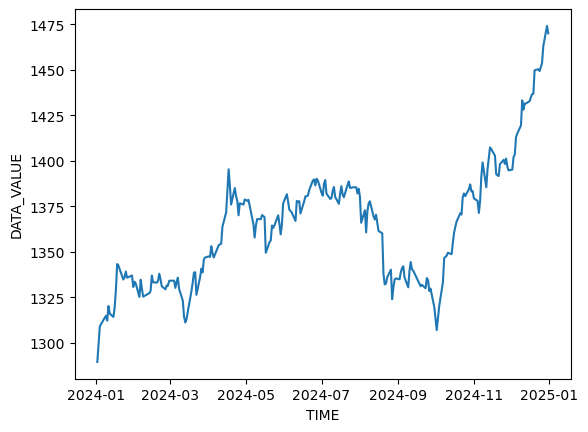

In [168]:
import matplotlib.pyplot as plt
sns.lineplot(x=temp_df['TIME'], y=temp_df['DATA_VALUE'])